# Look at your crunch
### Some exploratory analysis

In [1]:
import platform
import numpy as np
import math
import sys
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import requests
import matplotlib
import csv
import json
from pandas.io.json import json_normalize
from networkx.algorithms import community 
import itertools
import re
from tqdm.notebook import tqdm

In [26]:
G_bidder=nx.read_gpickle("G_bidder.gpickle")
G_bidder_self=nx.read_gpickle("G_bidder_self.gpickle")

In [20]:
print(nx.info(G_bidder))

Name: 
Type: MultiGraph
Number of nodes: 17953
Number of edges: 129088
Average degree:  14.3807


In [27]:
print(nx.info(G_bidder_self))

Name: 
Type: MultiGraph
Number of nodes: 17953
Number of edges: 208059
Average degree:  23.1782


In [28]:
Pallottola=pd.read_csv("Pallottola.csv")
Pallottola.head()

/users/testa/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6,20,21,24,25,26,27,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Organisation,Funding type,Money raised,Pre-money valuation,Date,Investors,Location,ID,Org_location,...,long_x,Node_y,Country_y,Coo_y,kind_y,id_y,coo_y,lat_y,long_y,idx
0,0,Meddy,Series A,"$2,500,000",NaN,2019-10-27,212.0,"Dubai, Dubai, United Arab Emirates, Asia",6132,"['Dubai', 'Dubai', 'United Arab Emirates', 'As...",...,55.188761,212.0,Turkey,"(41.0096334, 28.9651646)",Bidder,22557,"['41.0096334', '28.9651646']",41.009633,28.965165,0
1,1,Lemonaid Health,Series A,"$11,000,000",NaN,2017-05-22,415.0,"San Francisco, California, United States, Nort...",18965,"['San Francisco', 'California', 'United States...",...,-122.419906,415.0,United States,"(37.7790262, -122.4199061)",Bidder,22558,"['37.7790262', '-122.4199061']",37.779026,-122.419906,1
2,2,Prellis Biologics,Seed,"$1,800,000",NaN,2017-09-13,415.0,"San Francisco, California, United States, Nort...",17358,"['San Francisco', 'California', 'United States...",...,-122.419906,415.0,United States,"(37.7790262, -122.4199061)",Bidder,22558,"['37.7790262', '-122.4199061']",37.779026,-122.419906,2


### Create yearly snapshots

In [30]:
#Lista anni
lista_unique_year=[]
for i in pd.to_datetime(Pallottola['Date']):
    lista_unique_year.append(i.year)
insieme_year=set(lista_unique_year)
insieme_year

{1980,
 1982,
 1983,
 1984,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021}

In [44]:
for anno in insieme_year:
    locals()["SG_"+str(anno)]=nx.Graph([(u,v,d) for u,v,d in G_bidder.edges(data=True) if pd.to_datetime(d['date']).year==anno])

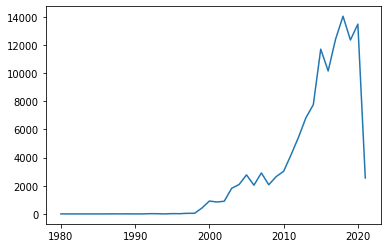

In [45]:
edges_subgraph=[]
nodes_subgraph=[]
avg_degree_subgraph=[]
for anno in insieme_year:
    edges_subgraph.append(locals()["SG_"+str(anno)].number_of_edges())
    nodes_subgraph.append(locals()["SG_"+str(anno)].number_of_nodes())
    avg_degree_subgraph.append(2*locals()["SG_"+str(anno)].number_of_edges()/(locals()["SG_"+str(anno)].number_of_nodes()+1))
    
plt.plot(list(insieme_year), edges_subgraph)

<AxesSubplot:>

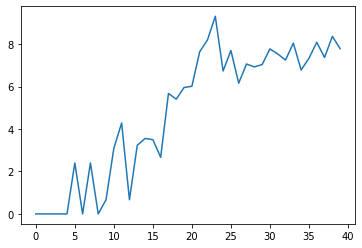

In [38]:
pd.Series(avg_degree_subgraph).plot()

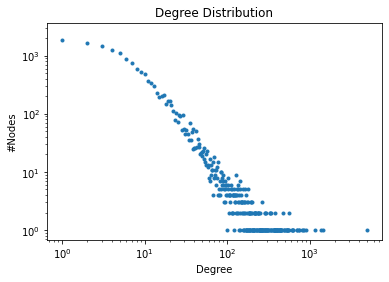

In [39]:
hist = nx.degree_histogram(G_bidder)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [46]:
for anno in insieme_year:
    locals()["SG_self_"+str(anno)]=nx.MultiGraph([(u,v,d) for u,v,d in G_bidder_self.edges(data=True) if pd.to_datetime(d['date']).year==anno])

In [47]:
lista_utilissima_numnodes=[]
for anno in insieme_year:
    lista_utilissima_numnodes.append(locals()["SG_self_"+str(anno)].number_of_nodes())

<AxesSubplot:>

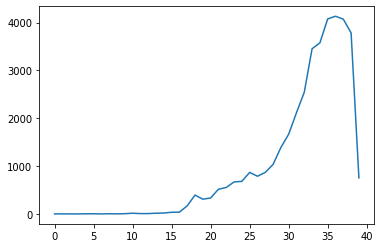

In [48]:
pd.Series(lista_utilissima_numnodes).plot()